In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv("../input/titanic/test.csv")

<AxesSubplot:ylabel='Frequency'>

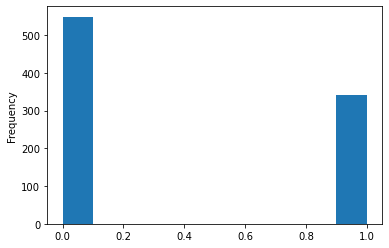

In [3]:
df['Survived'].plot(kind='hist')

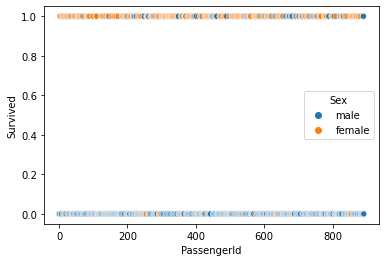

In [4]:
sns.scatterplot(data=df, y='Survived', x='PassengerId', hue='Sex')
plt.show()

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

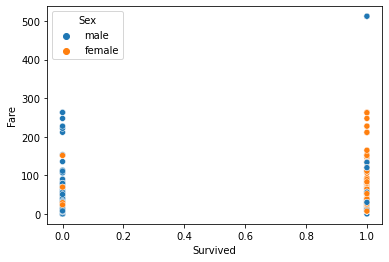

In [6]:
sns.scatterplot(data=df, y='Fare', x='Survived', hue='Sex')

# Hypothesis: passenger with expensive ticket survived

In [7]:
surviver_high_fare = df[df['Fare']>300]

surviver_high_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

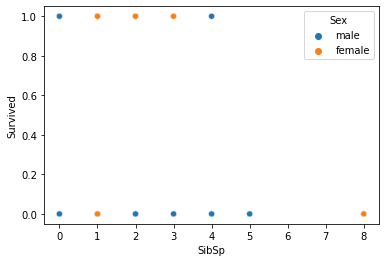

In [8]:
sns.scatterplot(x='SibSp', y='Survived', data=df, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

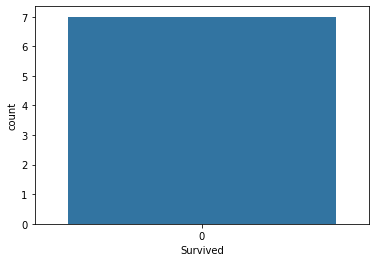

In [9]:
sns.countplot(x='Survived', data=df[df['SibSp']>=8])

In [10]:
# finding out which entries have cabin data.

with_cabin = df['Cabin'].isna().apply(lambda x:not x)
df['Cabin_data'] = with_cabin

with_cabin_test = test_df['Cabin'].isna().apply(lambda x:not x)
test_df['Cabin_data'] = with_cabin

In [11]:
# looks like Cabin value starting with 'F' are the only ones that doesn't have a room number
df.loc[df['Cabin_data'] & df['Cabin'].str.startswith('F ')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_data
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,True
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,True
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,True
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,True


In [12]:
df.loc[df['Cabin_data'] & df['Cabin'].str.startswith('F '),"Cabin"]="F"
test_df.loc[test_df['Cabin_data'] & test_df['Cabin'].str.startswith('F '),"Cabin"]="F"

In [13]:
# let's extract the deck number from the Cabin value

df['Deck'] = df['Cabin'].str.slice(0,1)
test_df['Deck'] = test_df['Cabin'].str.slice(0,1)

In [14]:
df['Deck']=df['Deck'].fillna('X')
test_df['Deck']=test_df['Deck'].fillna('X')

# Dropping the 'cabin' column as we have 'Fare' as proxy to represent the same

In [15]:

df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Deck']].copy()

test_df = test_df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Deck']].copy()

## What is the relation between Embarked point and survival?

<AxesSubplot:xlabel='Embarked', ylabel='count'>

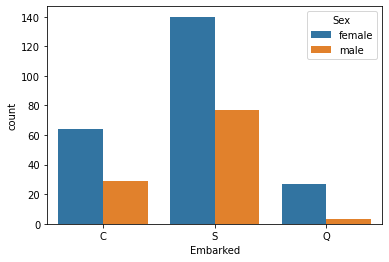

In [16]:
sns.countplot(x='Embarked', data=df[df['Survived']==1], hue='Sex')

People who embarked from 'S' survived the most, followed by people from 'C' and 'Q'.
* Possibly most people on the ship embarked from 'S', followed by 'C' and 'Q'

<AxesSubplot:xlabel='Embarked', ylabel='count'>

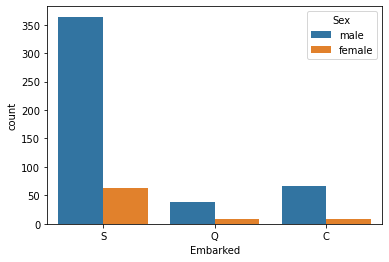

In [17]:
sns.countplot(x='Embarked', data=df[df['Survived']==0], hue='Sex')

Let's check the distribution of passengers who embarked from 'Q' against Fare

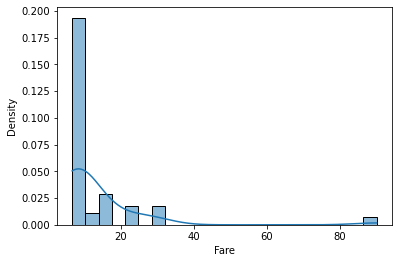

In [18]:
sns.histplot(data=df[df['Embarked']=='Q'], x='Fare', stat='density', kde=True)
plt.show()

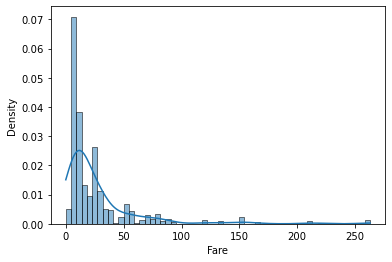

In [19]:
sns.histplot(data=df[df['Embarked']=='S'], x='Fare', stat='density', kde=True)
plt.show()

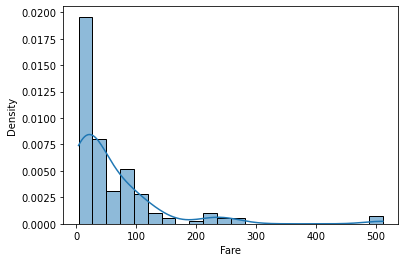

In [20]:
sns.histplot(data=df[df['Embarked']=='C'], x='Fare', stat='density', kde=True)
plt.show()

In [21]:
# Survival to Death ratio for people embarked from 'C'

survival_cnt = len(df.loc[(df['Embarked']=='C') & (df['Survived']==1)])
death_cnt = len(df.loc[(df['Embarked']=='C') & (df['Survived']==0)])

survival_cnt/death_cnt

1.24

In [22]:
# Survival to Death ratio for people embarked from 'S'

survival_cnt = len(df.loc[(df['Embarked']=='S') & (df['Survived']==1)])
death_cnt = len(df.loc[(df['Embarked']=='S') & (df['Survived']==0)])

survival_cnt/death_cnt

0.5081967213114754

In [23]:
# Survival to Death ratio for people embarked from 'Q'

survival_cnt = len(df.loc[(df['Embarked']=='Q') & (df['Survived']==1)])
death_cnt = len(df.loc[(df['Embarked']=='Q') & (df['Survived']==0)])

survival_cnt/death_cnt

0.6382978723404256

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Deck'],
      dtype='object')

In [25]:
# We can drop 'Embarked' as it is proportional to Fare which means Fare will act as proxy for Embarked

df=df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Deck']].copy()

test_df = test_df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare',  'Deck']].copy()

In [26]:
df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [27]:
df[['Survived', 'Parch']].corr()

,Survived,Parch
Survived,1.000000,0.081629
Parch,0.081629,1.000000


In [28]:
df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [29]:
df[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [30]:
titles=df['Name'].apply(lambda name: name.split(', ')[1].split('.')[0])
df['Title']=titles

titles=test_df['Name'].apply(lambda name: name.split(', ')[1].split('.')[0])
test_df['Title']=titles

<AxesSubplot:xlabel='Title', ylabel='count'>

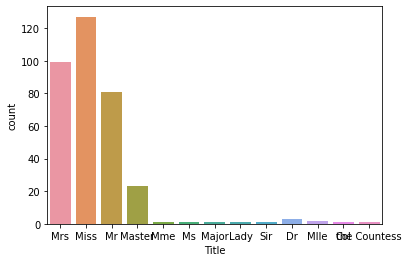

In [31]:
sns.countplot( x='Title', data=df.loc[df['Survived']==1])

<AxesSubplot:xlabel='Title', ylabel='count'>

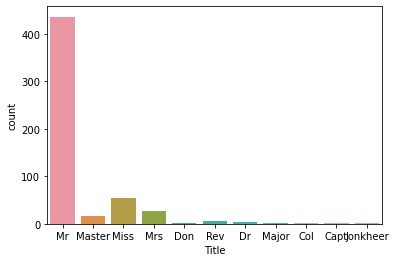

In [32]:
sns.countplot( x='Title', data=df.loc[df['Survived']==0])

### titles other than "Mr", "Master","Miss" , "Mrs" doesn't matter as they're outliers

In [33]:
Sex_cleaned = df['Sex'].apply(lambda sex:1 if sex=='male' else 0)

t_map = {"Mr":0,"Master":1,"Miss":2,"Mrs":3}
    
title_cleaned = df['Title'].apply(lambda title: 4 if title not in t_map else t_map[title])
# dropping the 'Name' variable as 'Title' will act as proxy for it.
# changing Sex from String to Int type
df=df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Fare', 'Deck', 'Parch']].copy()
df['Title']=title_cleaned
df['Sex']=Sex_cleaned

In [34]:
Sex_cleaned = test_df['Sex'].apply(lambda sex:1 if sex=='male' else 0)

t_map = {"Mr":0,"Master":1,"Miss":2,"Mrs":3}
    
title_cleaned = test_df['Title'].apply(lambda title:4 if title not in t_map else t_map[title])
# dropping the 'Name' variable as 'Title' will act as proxy for it.
# changing Sex from String to Int type
test_df=test_df[['PassengerId', 'Pclass', 'Age', 'SibSp',
       'Fare', 'Deck', 'Parch']].copy()
test_df['Title']=title_cleaned
test_df['Sex']=Sex_cleaned

In [35]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Deck,Parch,Title,Sex
0,1,0,3,22.0,1,7.2500,X,0,0,1
1,2,1,1,38.0,1,71.2833,C,0,3,0
2,3,1,3,26.0,0,7.9250,X,0,2,0
3,4,1,1,35.0,1,53.1000,C,0,3,0
4,5,0,3,35.0,0,8.0500,X,0,0,1


In [36]:
# Check all the rows where Age is NaN

df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Deck,Parch,Title,Sex
5,6,0,3,NaN,0,8.4583,X,0,0,1
17,18,1,2,NaN,0,13.0000,X,0,0,1
19,20,1,3,NaN,0,7.2250,X,0,3,0
26,27,0,3,NaN,0,7.2250,X,0,0,1
28,29,1,3,NaN,0,7.8792,X,0,2,0
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,7.2292,X,0,0,1
863,864,0,3,NaN,8,69.5500,X,2,2,0
868,869,0,3,NaN,0,9.5000,X,0,0,1
878,879,0,3,NaN,0,7.8958,X,0,0,1


In [37]:
passengers_w_age = df.loc[~df['Age'].isna()]

In [38]:
sum(test_df['Age'].isna())

86

In [39]:
test_pw_age = test_df.loc[~test_df['Age'].isna()]

In [40]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [41]:
t_mean_age = test_df['Age'].mean()
t_mean_age

30.272590361445783

In [42]:
df.loc[df['Age'].isna(), 'Age']=mean_age
test_df.loc[test_df['Age'].isna(), 'Age']=t_mean_age

In [43]:
mean_fare = test_df.loc[~test_df.Fare.isna() & (test_df.Pclass==3),'Fare'].mean()
test_df.loc[test_df.Fare.isna(), 'Fare'] = mean_fare

In [44]:
deck_code = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'X':9}

df['Deck'] = df['Deck'].apply(lambda deck:deck_code[deck])
test_df['Deck'] = test_df['Deck'].apply(lambda deck:deck_code[deck])

# Using Decision tree as classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Deck',
       'Parch', 'Title', 'Sex'],
      dtype='object')

In [47]:
# Title is a proxy for 'Sex'
feature_set = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',  'Title', 'Deck']
X=df[feature_set]
Y=df.Survived

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [49]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [50]:
Y_pred = classifier.predict(X_test)

In [51]:
metrics.accuracy_score(Y_test, Y_pred)

0.7425373134328358

In [52]:
# predict for test set
X_test = test_df[feature_set]
Y_pred = classifier.predict(X_test)

In [53]:
test_df['Survived']=Y_pred

In [54]:
output = test_df[['PassengerId', 'Survived']]

In [55]:
output.to_csv('/kaggle/working/submission.csv', index=False, sep=',')